In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
from numba import njit
from scipy.special import factorial, binom

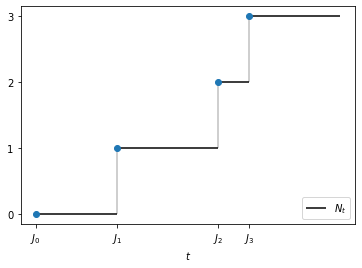

In [2]:
Ks = 0, 1, 2, 3
Js = 0, 0.8, 1.8, 2.1, 3
n = len(Ks)

fig, ax = plt.subplots()

ax.plot(Js[:-1], Ks, 'o')
ax.hlines(Ks, Js[:-1], Js[1:], label='$N_t$')
ax.vlines(Js[:-1], (0, Ks[0], Ks[1], Ks[2]), Ks, alpha=0.25)

ax.set(xticks=Js[:-1],
       xticklabels=[f'$J_{k}$' for k in range(n)],
       yticks=(0, 1, 2, 3),
       xlabel='$t$')

ax.legend(loc='lower right')
plt.show()

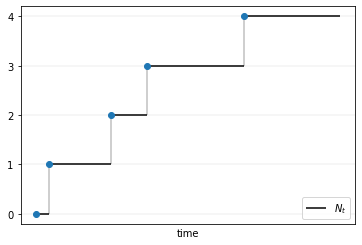

In [3]:
np.random.seed(1234)
T = 5
Ws = np.random.exponential(size=T)
Js = np.cumsum(Ws)
Ys = np.arange(T)

fig, ax = plt.subplots()

ax.plot(np.insert(Js, 0, 0)[:-1], Ys, 'o')
ax.hlines(Ys, np.insert(Js, 0, 0)[:-1], Js, label='$N_t$')
ax.vlines(Js[:-1], Ys[:-1], Ys[1:], alpha=0.25)

ax.set(xticks=[],
       yticks=range(Ys.max()+1),
       xlabel='time')

ax.grid(lw=0.2)
ax.legend(loc='lower right')
plt.show()

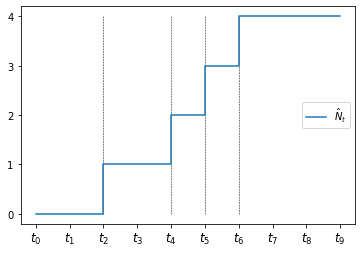

In [4]:
fig, ax = plt.subplots()
np.random.seed(1)
T = 10
p = 0.25
B = np.random.uniform(size=T) < p
N = np.cumsum(B)
m = N[-1]  # max of N

t_grid = np.arange(T)
t_ticks = [f'$t_{i}$' for i in t_grid]
ax.set_yticks(range(m+1))
ax.set_xticks(t_grid)
ax.set_xticklabels(t_ticks, fontsize=12)

ax.step(t_grid, np.insert(N, 0, 0)[:-1], label='$\hat N_t$')

for i in t_grid:
    if B[i]:
        ax.vlines((i,), (0,), (m,), ls='--', lw=0.5)

ax.legend(loc='center right')
plt.show()

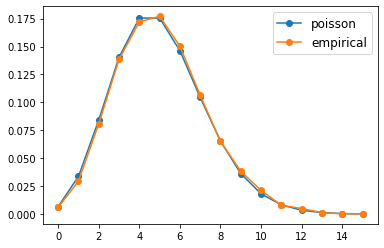

In [5]:
λ = 0.5
T = 10

def poisson(k, r):
    "Poisson pmf with rate r."
    return np.exp(-r) * (r**k) / factorial(k)

@njit
def draw_Nt(max_iter=1e5):
    J = 0
    n = 0
    while n < max_iter:
        W = np.random.exponential(scale=1/λ)
        J += W
        if J > T:
            return n
        n += 1

@njit
def draw_Nt_sample(num_draws):
    draws = np.empty(num_draws)
    for i in range(num_draws):
        draws[i] = draw_Nt()
    return draws


sample_size = 10_000
sample = draw_Nt_sample(sample_size)
max_val = sample.max()
vals = np.arange(0, max_val+1)

fig, ax = plt.subplots()

ax.plot(vals, [poisson(v, T * λ) for v in vals], 
    marker='o', label='poisson')
ax.plot(vals, [np.mean(sample==v) for v in vals], 
    marker='o', label='empirical')

ax.legend(fontsize=12)
plt.show()

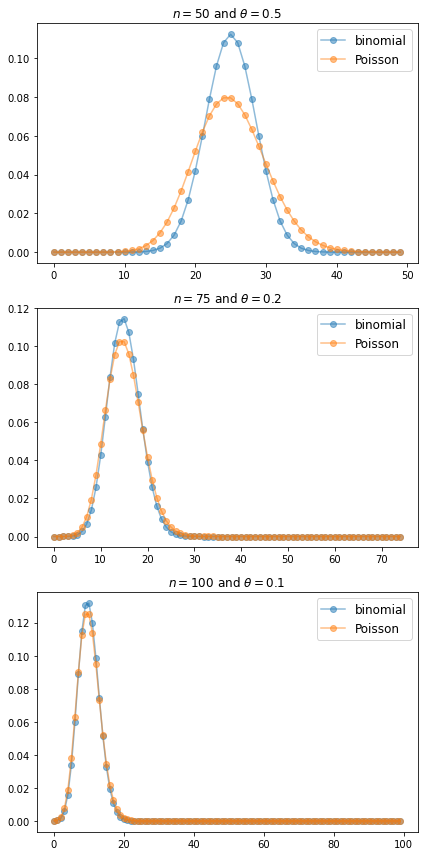

In [6]:
def binomial(k, n, p):
    # Binomial(n, p) pmf evaluated at k
    return binom(n, k) * p**k * (1-p)**(n-k)

θ_vals = 0.5, 0.2, 0.1

n_vals = 50, 75, 100

fig, axes = plt.subplots(len(n_vals), 1, figsize=(6, 12))

for n, θ, ax in zip(n_vals, θ_vals, axes.flatten()):

    k_grid = np.arange(n)
    binom_vals = [binomial(k, n, θ) for k in k_grid]
    poisson_vals = [poisson(k, n * θ) for k in k_grid]
    ax.plot(k_grid, binom_vals, 'o-', alpha=0.5, label='binomial')
    ax.plot(k_grid, poisson_vals, 'o-', alpha=0.5, label='Poisson')
    ax.set_title(f'$n={n}$ and $\\theta = {θ}$')
    ax.legend(fontsize=12)

fig.tight_layout()
plt.show()